In [81]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import json

Load squad predictions for all models

In [83]:
with open('/Users/christoskallaras/code/personal/claimer_detection/squad/distilbert_predictions_squad.json', 'r') as f:
    distilbert_squad_predictions = json.load(f)

with open('/Users/christoskallaras/code/personal/claimer_detection/squad/roberta_squad_predictions.json', 'r') as f:
    roberta_squad_predictions = json.load(f)
    
with open('/Users/christoskallaras/code/personal/claimer_detection/squad/bart_predictions_squad.json', 'r') as f:
    bart_squad_predictions = json.load(f)

with open('/Users/christoskallaras/code/personal/claimer_detection/squad/albert_squad_predictions.json', 'r') as f:
    albert_squad_predictions = json.load(f)


Load GNQ predictions for all models

In [118]:
with open('/Users/christoskallaras/code/personal/claimer_detection/gnq/distilbert_predictions_nq.json', 'r') as f:
    distilbert_nq_predictions = json.load(f)

with open('/Users/christoskallaras/code/personal/claimer_detection/gnq/roberta_nq_predictions.json', 'r') as f:
    roberta_nq_predictions = json.load(f)
    
with open('/Users/christoskallaras/code/personal/claimer_detection/gnq/bart_nq_predictions.json', 'r') as f:
    bart_nq_predictions = json.load(f)
    
with open('/Users/christoskallaras/code/personal/claimer_detection/gnq/albert_nq_predictions.json', 'r') as f:
    albert_nq_predictions = json.load(f)

Load annotated predictions for all models

In [120]:
with open('/Users/christoskallaras/code/personal/claimer_detection/predictions/distilbert_predictions_annotated.json', 'r') as f:
    distilbert_annotated_predictions = json.load(f)

with open('/Users/christoskallaras/code/personal/claimer_detection/predictions/roberta_annotated_predictions.json', 'r') as f:
    roberta_annotated_predictions = json.load(f)
    
with open('/Users/christoskallaras/code/personal/claimer_detection/predictions/bart_annotated_predictions.json', 'r') as f:
    bart_annotated_predictions = json.load(f)

with open('/Users/christoskallaras/code/personal/claimer_detection/predictions/albert_annotated_predictions.json', 'r') as f:
    albert_annotated_predictions = json.load(f)

Load evaluation sets

In [87]:
# squad
with open('/Users/christoskallaras/code/personal/claimer_detection/squad/dev-v2.0.json', 'r') as f:
    squad = json.load(f)['data']

# gnq
with open('/Users/christoskallaras/code/personal/claimer_detection/natural_question/gnq_evaluation.json', 'r') as f:
    gnq = json.load(f)['data']

# annotated
with open('/Users/christoskallaras/code/personal/claimer_detection/annotated_evaluation.json', 'r') as f:
    annotated = json.load(f)['data']


First plot scatterplots of the predicted vs actuall values for the SQUAD dataset for all 4 models

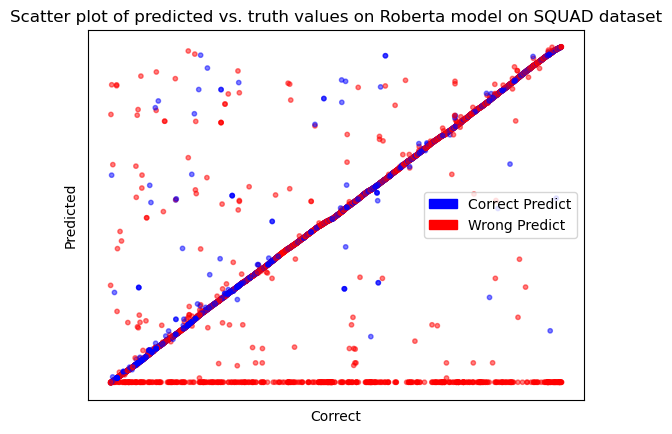

In [108]:
# Roberta
ground_truth = []
predicted = []

for article in squad:
    for paragraph in article['paragraphs']:
        for qa in paragraph['qas']:
            if str(qa['id']) in roberta_squad_predictions:
                # Check if the question has at least one answer
                if qa['answers']:
                    ground_truth.append(qa['answers'][0]['text'])
                    predicted.append(roberta_squad_predictions[str(qa['id'])])

# create scatter plot of predicted vs. ground truth values with different colors
plt.scatter(ground_truth, predicted, s=10, alpha=0.5, c=['red' if x!=y else 'blue' for x,y in zip(ground_truth, predicted)])

# set title
plt.title('Scatter plot of predicted vs. truth values on Roberta model on SQUAD dataset')
# set axis labels
plt.xlabel('Correct')
plt.ylabel('Predicted')
# remove tick labels on x and y axes
plt.xticks([])
plt.yticks([])
# add legend
blue_patch = mpatches.Patch(color='blue', label='Correct Predict')
red_patch = mpatches.Patch(color='red', label='Wrong Predict')
plt.legend(handles=[blue_patch, red_patch])


# show plot
plt.show()

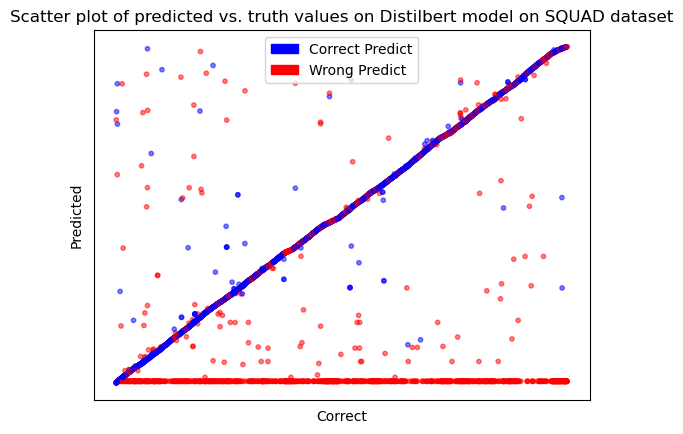

In [89]:
# Distilbert
ground_truth = []
predicted = []

for article in squad:
    for paragraph in article['paragraphs']:
        for qa in paragraph['qas']:
            if qa['id'] in distilbert_squad_predictions:
                # Check if the question has at least one answer
                if qa['answers']:
                    ground_truth.append(qa['answers'][0]['text'])
                    predicted.append(distilbert_squad_predictions[qa['id']])

# create scatter plot of predicted vs. ground truth values with different colors
plt.scatter(ground_truth, predicted, s=10, alpha=0.5, c=['red' if x!=y else 'blue' for x,y in zip(ground_truth, predicted)])

# set title
plt.title('Scatter plot of predicted vs. truth values on Distilbert model on SQUAD dataset')
# set axis labels
plt.xlabel('Correct')
plt.ylabel('Predicted')
# remove tick labels on x and y axes
plt.xticks([])
plt.yticks([])
# add legend
blue_patch = mpatches.Patch(color='blue', label='Correct Predict')
red_patch = mpatches.Patch(color='red', label='Wrong Predict')
plt.legend(handles=[blue_patch, red_patch])


# show plot
plt.show()


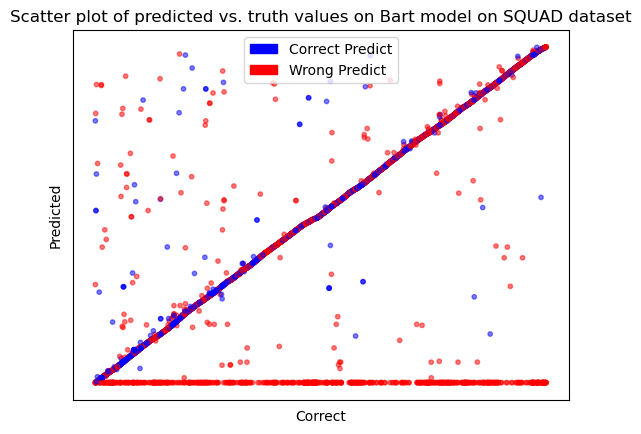

In [90]:
# Bart
ground_truth = []
predicted = []

for article in squad:
    for paragraph in article['paragraphs']:
        for qa in paragraph['qas']:
            if str(qa['id']) in bart_squad_predictions:
                # Check if the question has at least one answer
                if qa['answers']:
                    ground_truth.append(qa['answers'][0]['text'])
                    predicted.append(bart_squad_predictions[str(qa['id'])])

# create scatter plot of predicted vs. ground truth values with different colors
plt.scatter(ground_truth, predicted, s=10, alpha=0.5, c=['red' if x!=y else 'blue' for x,y in zip(ground_truth, predicted)])

# set title
plt.title('Scatter plot of predicted vs. truth values on Bart model on SQUAD dataset')
# set axis labels
plt.xlabel('Correct')
plt.ylabel('Predicted')
# remove tick labels on x and y axes
plt.xticks([])
plt.yticks([])
# add legend
blue_patch = mpatches.Patch(color='blue', label='Correct Predict')
red_patch = mpatches.Patch(color='red', label='Wrong Predict')
plt.legend(handles=[blue_patch, red_patch])


# show plot
plt.show()

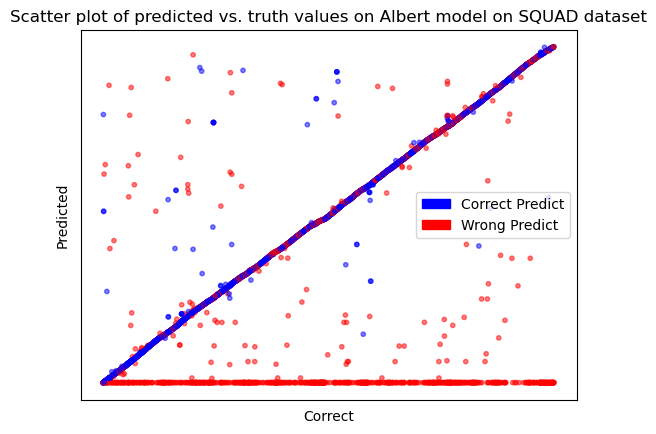

In [107]:
# Albert
ground_truth = []
predicted = []

for article in squad:
    for paragraph in article['paragraphs']:
        for qa in paragraph['qas']:
            if str(qa['id']) in albert_squad_predictions:
                # Check if the question has at least one answer
                if qa['answers']:
                    ground_truth.append(qa['answers'][0]['text'])
                    predicted.append(albert_squad_predictions[str(qa['id'])])

# create scatter plot of predicted vs. ground truth values with different colors
plt.scatter(ground_truth, predicted, s=10, alpha=0.5, c=['red' if x!=y else 'blue' for x,y in zip(ground_truth, predicted)])

# set title
plt.title('Scatter plot of predicted vs. truth values on Albert model on SQUAD dataset')
# set axis labels
plt.xlabel('Correct')
plt.ylabel('Predicted')
# remove tick labels on x and y axes
plt.xticks([])
plt.yticks([])
# add legend
blue_patch = mpatches.Patch(color='blue', label='Correct Predict')
red_patch = mpatches.Patch(color='red', label='Wrong Predict')
plt.legend(handles=[blue_patch, red_patch])


# show plot
plt.show()

The models are performing reasonably well and are making correct predictions for the majority of the cases. The straight red line on the x-axis full of red dots, on the other hand, indicates that there are certain cases where the models are consistently failing to make accurate predictions, regardless of which model is being used. This can happen by questions that the answer is not in text, examples that the squad dataset has. However models predictions seems to be close to the actual values.

Now we plot scatterplots of the predicted vs actuall values for the GNQ dataset for all 4 models

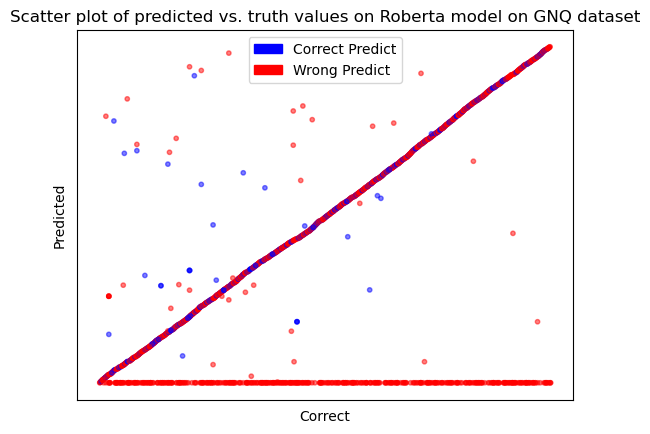

In [109]:
# Roberta
ground_truth = []
predicted = []

for article in gnq:
    for paragraph in article['paragraphs']:
        for qa in paragraph['qas']:
            if str(qa['id']) in roberta_nq_predictions:
                # Check if the question has at least one answer
                if qa['answers']:
                    ground_truth.append(qa['answers'][0]['text'])
                    predicted.append(roberta_nq_predictions[str(qa['id'])])

# create scatter plot of predicted vs. ground truth values with different colors
plt.scatter(ground_truth, predicted, s=10, alpha=0.5, c=['red' if x!=y else 'blue' for x,y in zip(ground_truth, predicted)])

# set title
plt.title('Scatter plot of predicted vs. truth values on Roberta model on GNQ dataset')
# set axis labels
plt.xlabel('Correct')
plt.ylabel('Predicted')
# remove tick labels on x and y axes
plt.xticks([])
plt.yticks([])
# add legend
blue_patch = mpatches.Patch(color='blue', label='Correct Predict')
red_patch = mpatches.Patch(color='red', label='Wrong Predict')
plt.legend(handles=[blue_patch, red_patch])


# show plot
plt.show()

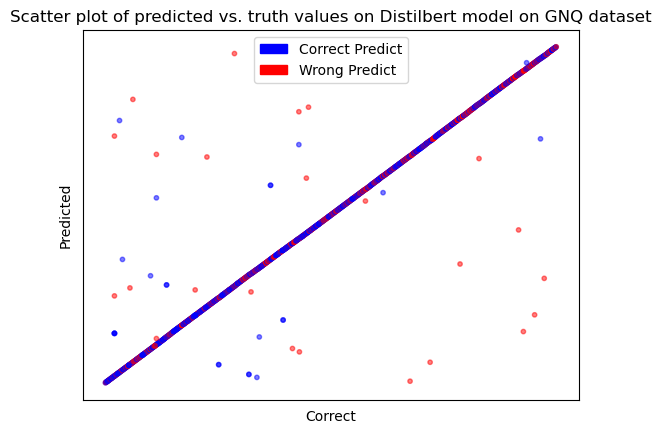

In [110]:
# Distilbert
ground_truth = []
predicted = []

for article in gnq:
    for paragraph in article['paragraphs']:
        for qa in paragraph['qas']:
            if str(qa['id']) in distilbert_nq_predictions:
                # Check if the question has at least one answer
                if qa['answers']:
                    ground_truth.append(qa['answers'][0]['text'])
                    predicted.append(distilbert_nq_predictions[str(qa['id'])])

# create scatter plot of predicted vs. ground truth values with different colors
plt.scatter(ground_truth, predicted, s=10, alpha=0.5, c=['red' if x!=y else 'blue' for x,y in zip(ground_truth, predicted)])

# set title
plt.title('Scatter plot of predicted vs. truth values on Distilbert model on GNQ dataset')
# set axis labels
plt.xlabel('Correct')
plt.ylabel('Predicted')
# remove tick labels on x and y axes
plt.xticks([])
plt.yticks([])
# add legend
blue_patch = mpatches.Patch(color='blue', label='Correct Predict')
red_patch = mpatches.Patch(color='red', label='Wrong Predict')
plt.legend(handles=[blue_patch, red_patch])


# show plot
plt.show()

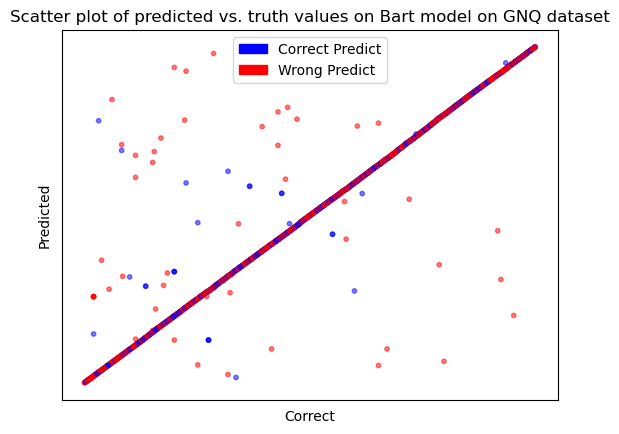

In [119]:
# Bart
ground_truth = []
predicted = []

for article in gnq:
    for paragraph in article['paragraphs']:
        for qa in paragraph['qas']:
            if str(qa['id']) in bart_nq_predictions:
                # Check if the question has at least one answer
                if qa['answers']:
                    ground_truth.append(qa['answers'][0]['text'])
                    predicted.append(bart_nq_predictions[str(qa['id'])])

# create scatter plot of predicted vs. ground truth values with different colors
plt.scatter(ground_truth, predicted, s=10, alpha=0.5, c=['red' if x!=y else 'blue' for x,y in zip(ground_truth, predicted)])

# set title
plt.title('Scatter plot of predicted vs. truth values on Bart model on GNQ dataset')
# set axis labels
plt.xlabel('Correct')
plt.ylabel('Predicted')
# remove tick labels on x and y axes
plt.xticks([])
plt.yticks([])
# add legend
blue_patch = mpatches.Patch(color='blue', label='Correct Predict')
red_patch = mpatches.Patch(color='red', label='Wrong Predict')
plt.legend(handles=[blue_patch, red_patch])


# show plot
plt.show()

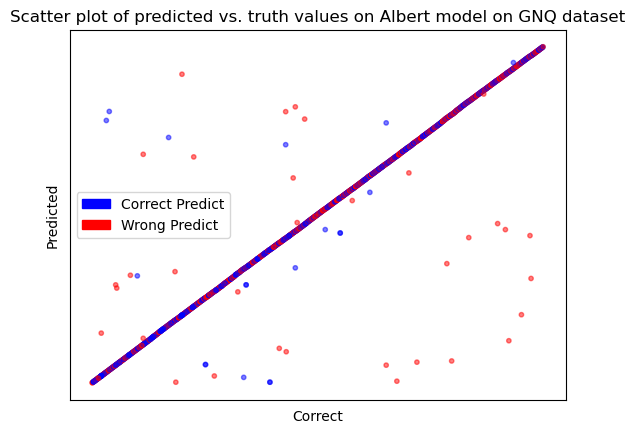

In [113]:
# Albert
ground_truth = []
predicted = []

for article in gnq:
    for paragraph in article['paragraphs']:
        for qa in paragraph['qas']:
            if str(qa['id']) in albert_nq_predictions:
                # Check if the question has at least one answer
                if qa['answers']:
                    ground_truth.append(qa['answers'][0]['text'])
                    predicted.append(albert_nq_predictions[str(qa['id'])])

# create scatter plot of predicted vs. ground truth values with different colors
plt.scatter(ground_truth, predicted, s=10, alpha=0.5, c=['red' if x!=y else 'blue' for x,y in zip(ground_truth, predicted)])

# set title
plt.title('Scatter plot of predicted vs. truth values on Albert model on GNQ dataset')
# set axis labels
plt.xlabel('Correct')
plt.ylabel('Predicted')
# remove tick labels on x and y axes
plt.xticks([])
plt.yticks([])
# add legend
blue_patch = mpatches.Patch(color='blue', label='Correct Predict')
red_patch = mpatches.Patch(color='red', label='Wrong Predict')
plt.legend(handles=[blue_patch, red_patch])


# show plot
plt.show()

Distilbert has the most correct predictions with significantly fewer wrong predictions. Roberta although had a high score of 79.96, has the most wrong predictions. Albert and Bart also have fewer wrong predictions than Roberta but no less than DistilBert. This means that DistilBert appears to be the model with the best performance as the resulting metrics after training on SQUAD and GNQ indicate strong performance.

Finally, we plot scatterplots of the predicted vs actuall values for the Annotated dataset for all 4 models

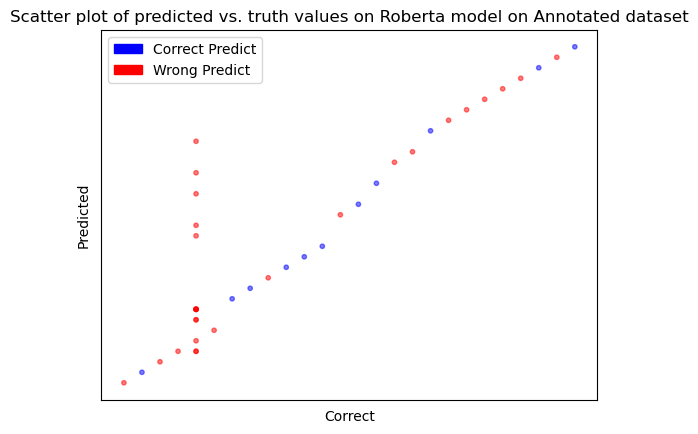

In [121]:
# Roberta
ground_truth = []
predicted = []

for article in annotated:
    for paragraph in article['paragraphs']:
        for qa in paragraph['qas']:
            if str(qa['id']) in roberta_annotated_predictions:
                # Check if the question has at least one answer
                if qa['answers']:
                    ground_truth.append(qa['answers'][0]['text'])
                    predicted.append(roberta_annotated_predictions[str(qa['id'])])

# create scatter plot of predicted vs. ground truth values with different colors
plt.scatter(ground_truth, predicted, s=10, alpha=0.5, c=['red' if x!=y else 'blue' for x,y in zip(ground_truth, predicted)])

# set title
plt.title('Scatter plot of predicted vs. truth values on Roberta model on Annotated dataset')
# set axis labels
plt.xlabel('Correct')
plt.ylabel('Predicted')
# remove tick labels on x and y axes
plt.xticks([])
plt.yticks([])
# add legend
blue_patch = mpatches.Patch(color='blue', label='Correct Predict')
red_patch = mpatches.Patch(color='red', label='Wrong Predict')
plt.legend(handles=[blue_patch, red_patch])

# show plot
plt.show()

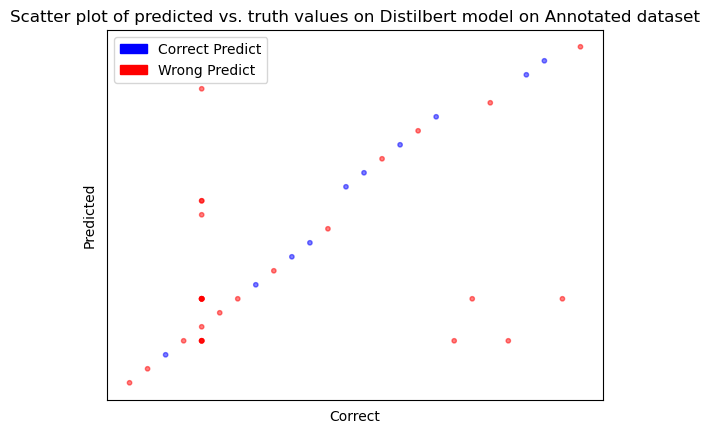

In [115]:
# Distilbert
ground_truth = []
predicted = []

for article in annotated:
    for paragraph in article['paragraphs']:
        for qa in paragraph['qas']:
            if str(qa['id']) in distilbert_annotated_predictions:
                # Check if the question has at least one answer
                if qa['answers']:
                    ground_truth.append(qa['answers'][0]['text'])
                    predicted.append(distilbert_annotated_predictions[str(qa['id'])])

# create scatter plot of predicted vs. ground truth values with different colors
plt.scatter(ground_truth, predicted, s=10, alpha=0.5, c=['red' if x!=y else 'blue' for x,y in zip(ground_truth, predicted)])

# set title
plt.title('Scatter plot of predicted vs. truth values on Distilbert model on Annotated dataset')
# set axis labels
plt.xlabel('Correct')
plt.ylabel('Predicted')
# remove tick labels on x and y axes
plt.xticks([])
plt.yticks([])
# add legend
blue_patch = mpatches.Patch(color='blue', label='Correct Predict')
red_patch = mpatches.Patch(color='red', label='Wrong Predict')
plt.legend(handles=[blue_patch, red_patch])



# show plot
plt.show()

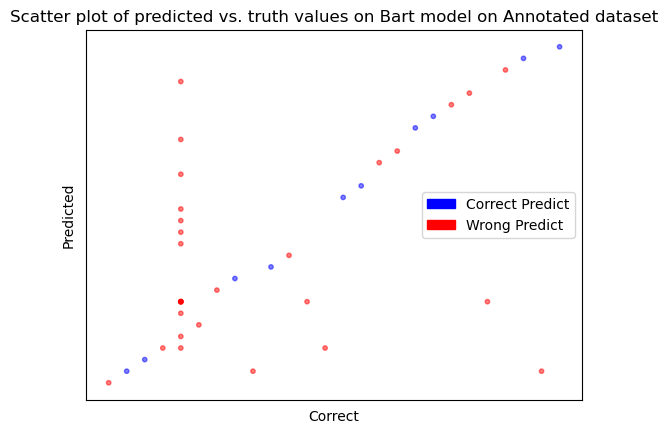

In [116]:
# Bart
ground_truth = []
predicted = []

for article in annotated:
    for paragraph in article['paragraphs']:
        for qa in paragraph['qas']:
            if str(qa['id']) in bart_annotated_predictions:
                # Check if the question has at least one answer
                if qa['answers']:
                    ground_truth.append(qa['answers'][0]['text'])
                    predicted.append(bart_annotated_predictions[str(qa['id'])])

# create scatter plot of predicted vs. ground truth values with different colors
plt.scatter(ground_truth, predicted, s=10, alpha=0.5, c=['red' if x!=y else 'blue' for x,y in zip(ground_truth, predicted)])

# set title
plt.title('Scatter plot of predicted vs. truth values on Bart model on Annotated dataset')
# set axis labels
plt.xlabel('Correct')
plt.ylabel('Predicted')
# remove tick labels on x and y axes
plt.xticks([])
plt.yticks([])
# add legend
blue_patch = mpatches.Patch(color='blue', label='Correct Predict')
red_patch = mpatches.Patch(color='red', label='Wrong Predict')
plt.legend(handles=[blue_patch, red_patch])

# show plot
plt.show()

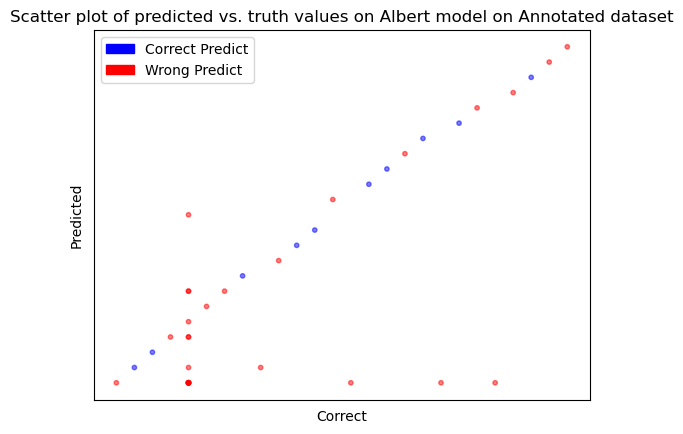

In [117]:
# Albert
ground_truth = []
predicted = []

for article in annotated:
    for paragraph in article['paragraphs']:
        for qa in paragraph['qas']:
            if str(qa['id']) in albert_annotated_predictions:
                # Check if the question has at least one answer
                if qa['answers']:
                    ground_truth.append(qa['answers'][0]['text'])
                    predicted.append(albert_annotated_predictions[str(qa['id'])])

# create scatter plot of predicted vs. ground truth values with different colors
plt.scatter(ground_truth, predicted, s=10, alpha=0.5, c=['red' if x!=y else 'blue' for x,y in zip(ground_truth, predicted)])

# set title
plt.title('Scatter plot of predicted vs. truth values on Albert model on Annotated dataset')
# set axis labels
plt.xlabel('Correct')
plt.ylabel('Predicted')
# remove tick labels on x and y axes
plt.xticks([])
plt.yticks([])
# add legend
blue_patch = mpatches.Patch(color='blue', label='Correct Predict')
red_patch = mpatches.Patch(color='red', label='Wrong Predict')
plt.legend(handles=[blue_patch, red_patch])

# show plot
plt.show()

The annotated set is extremely small (only 140 articles), so it is not safe to jump to any conclusion based on metrics and scatterplots